Отчет о задержках авиарейсов в аэропортах Нью-Йорка в 2013 году.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
s = pd.read_csv('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv')
k = pd.read_csv('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv')

In [35]:
s.head(20)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


In [36]:
k.head(20)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
8,9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
9,10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


In [37]:
len(s)

336776

In [38]:
len(k)

8719

1) Найдем зависимость количества отмененных рейсов от времени дня

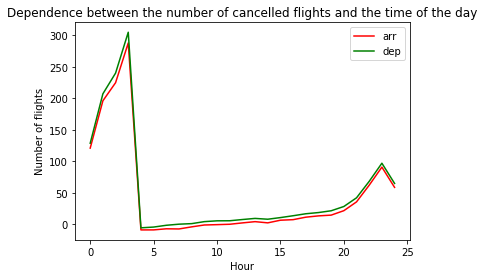

In [39]:
plt.plot(s.groupby('hour')['arr_delay'].mean(), label='arr', c='red')
plt.plot(s.groupby('hour')['dep_delay'].mean(), label='dep', c ='green')
plt.xlabel('Hour')
plt.ylabel('Number of flights')
plt.title('Dependence between the number of cancelled flights and the time of the day')
plt.legend()
plt.show()

Как мы можем заметить, пик задержек приходится на раннее утро в районе 3-4 утра. А также количество отмененных вылетов и прилетов примерно совпадает в любое время суток.

2) Среднее время опоздания рейсов по месяцам

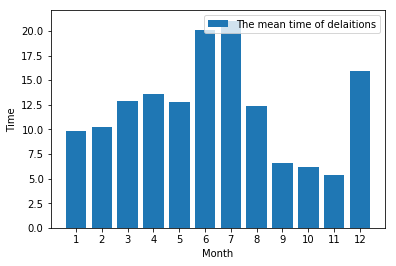

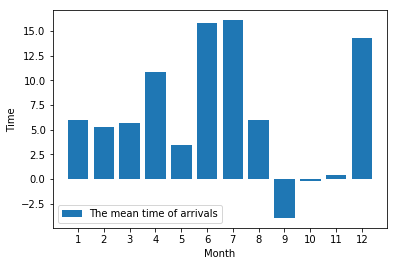

In [44]:
plt.bar([f'{i+1}' for i in range(12)], s.groupby('month')['dep_delay'].sum()/s.groupby('month')['Unnamed: 0'].count(), label='The mean time of delaitions')
plt.xlabel('Month')
plt.ylabel('Time')
plt.legend()
plt.show()
plt.bar([f'{i+1}' for i in range(12)], s.groupby('month')['arr_delay'].sum()/s.groupby('month')['Unnamed: 0'].count(), label='The mean time of arrivals')
plt.xlabel('Month')
plt.ylabel('Time')
plt.legend()
plt.show()

Самое большое количество опозданий прилетающих и вылетающих рейсов пришлось на июль.

3) Сравним количество отмененных рейсов разных авиакомпаний

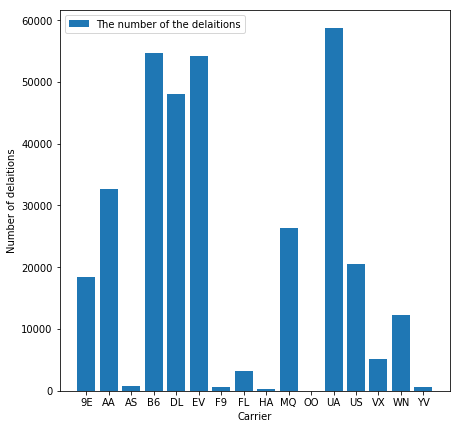

In [71]:
plt.figure(figsize=(7,7))
plt.bar(s.groupby('carrier')['Unnamed: 0'].count().index, s.groupby('carrier')['Unnamed: 0'].count(), label='The number of the delaitions')
plt.xlabel('Carrier')
plt.ylabel('Number of delaitions')
plt.legend()
plt.show()

Самое большое количество рейсов отменяет авиакомпания UA.

4)Зависимость задержки рейса от видимости

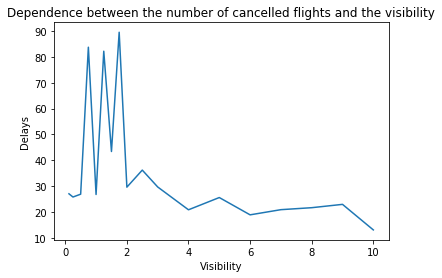

In [81]:
r=s.merge(k, on=['year', 'month', 'day', 'hour', 'origin'] )
plt.plot(pd.DataFrame(r.groupby('visib')['dep_delay'].mean()).index, pd.DataFrame(r.groupby('visib')['dep_delay'].mean()))
plt.xlabel('Visibility')
plt.ylabel('Delays')
plt.title('Dependence between the number of cancelled flights and the visibility')
plt.show()

Довольно понятная зависимость: чем меньше видимость, тем больше задержек.

5) Зависимость задержки рейса от скорости ветра

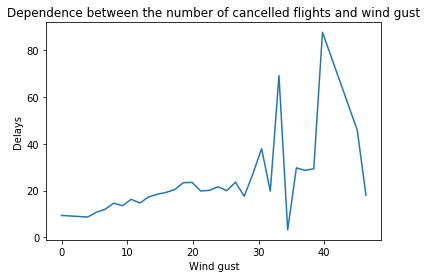

In [91]:
r = s.merge(k, on=['year', 'month', 'day', 'hour', 'origin'])
l=pd.DataFrame(r.groupby('wind_speed')['dep_delay'].mean()).sort_values("wind_speed")
h=l.drop(labels = [l.index[-1]])
plt.plot(h.index, h)
plt.xlabel('Wind speed')
plt.ylabel('Delays')
plt.title('Dependence between the number of cancelled flights and wind speed')
plt.show()

Как можно заметить, при возрастании скорости ветра возрастает и количество задержек. А скачки могут быть связаны с направлением ветра.

6) Выясним зависимость средней задержки от направления ветра

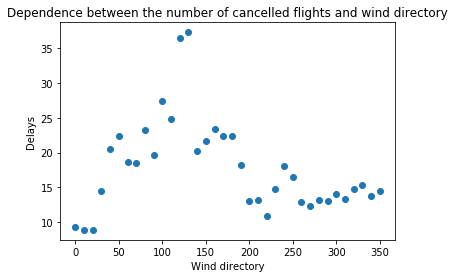

In [94]:
r = s.merge(k, on=['year', 'month', 'day', 'hour', 'origin'])
l=pd.DataFrame(r.groupby('wind_dir')['dep_delay'].mean()).sort_values("wind_dir")
h=l.drop(labels = [l.index[-1]])
plt.scatter(h.index, h)
plt.xlabel('Wind directory')
plt.ylabel('Delays')
plt.title('Dependence between the number of cancelled flights and wind directory')
plt.show()

Таким образом, было исследовано, что большинство задержек происходит ночью, а также в июле. Также отмена рейсов напрямую зависит от погодных условий.